In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from fitter import Fitter

In [18]:
train_df = pd.read_csv('../data/modified_train_binaaz.csv')
train_df

,link,publication_date,poster,latitude,longitude,category,floor,area,rooms,kupcha,repairs,hypothec,location attributes,price,currency,title,poster_type,address,description,id
0,https://bina.az//items/3142195,25 Yanvar 2023,Şamrad,40.393812,49.794077,Köhnə tikili,9 / 9,85 m²,3,var,var,var,"['İnşaatçılar m.', 'Yasamal r.', 'Yeni Yasamal...",130000,AZN,"Satılır 3 otaqlı köhnə tikili 85 m², İnşaatçıl...",vasitəçi (agent),"Ünvan: Bakı şəhəri, Əsəd Əhmədov küçəsi",Yeni Yasamal Bravo ve Bizim marketin yaninda y...,3142195
1,https://bina.az//items/3141775,10 Yanvar 2023,Orxan bəy,40.387151,49.788395,Yeni tikili,11 / 13,80 m²,2,var,var,var,['Yasamal r.'],137000,AZN,"Satılır 2 otaqlı yeni tikili 80 m², Yasamal r.",vasitəçi (agent),"Ünvan: Bakı şəhəri, Xarici dairəvi yol",COX TƏCİLİ SATİLİR!!\nKUPÇALİ + İPOTEKAYA YARA...,3141775
2,https://bina.az//items/3187551,03 Yanvar 2023,Ferid,40.388360,49.837184,Yeni tikili,4 / 16,145 m²,3,var,yoxdur,var,"['Park Zorge', 'Rusiya səfirliyi', 'Koala park...",280000,AZN,"Satılır 3 otaqlı yeni tikili 145 m², Nəsimi r.",vasitəçi (agent),"Ünvan: Bakı şəhəri, S.Vurğun küç.",Nesimi rayonu Turk sefirliyi yaxinliginda yeni...,3187551
3,https://bina.az//items/3182750,29 Dekabr 2022,Ruslan,40.370986,49.840404,Köhnə tikili,3 / 3,65 m²,3,var,var,NaN,"['Fontanlar bağı', 'Xalça Muzeyi', 'Sahil m.',...",220000,AZN,"Satılır 3 otaqlı köhnə tikili 65 m², Sahil m.",vasitəçi (agent),"Ünvan: Bakı şəhəri, Üzeyir Hacıbəyov küçəsi","Sahil metrosu,Tarqovu,Fransa səfirliyi,Malakan...",3182750
4,https://bina.az//items/3210126,14 Yanvar 2023,Natəvan X.,40.390316,49.788850,Yeni tikili,16 / 16,85 m²,2,yoxdur,var,NaN,"['Yasamal r.', 'Yeni Yasamal q.']",126000,AZN,"Satılır 2 otaqlı yeni tikili 85 m², Yeni Yasam...",vasitəçi (agent),"Ünvan: Bakı şəhəri, Əsəd Əhmədov küçəsi",TƏCİLİ SATILIR!!!!\nYeni Yasamalda 77 nomreli ...,3210126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23979,https://bina.az//items/3187925,15 Yanvar 2023,Ceyhun,40.411714,49.803112,Yeni tikili,20 / 22,105 m²,3,var,var,var,"['Yasamal r.', 'Yasamal q.']",168000,AZN,"Satılır 3 otaqlı yeni tikili 105 m², Yasamal q.",vasitəçi (agent),"Ünvan: Bakı şəhəri, Moskva Prospekti",Ipotekaya Yararli \nYasamal Rayonu 20Yanvar Me...,3187925
23980,https://bina.az//items/3200960,10 Yanvar 2023,Ağa,40.379333,49.839883,Yeni tikili,10 / 16,173 m²,3,var,yoxdur,NaN,"['Qış parkı', 'Sirk', 'Bakı Musiqi Akademiyası...",398000,AZN,"Satılır 3 otaqlı yeni tikili 173 m², 28 May m.",vasitəçi (agent),"Ünvan: Bakı şəhəri, Səməd Vurğun küçəsi 17",Qış Parkının yanında 3 otaqlı təmirsiz mənzil ...,3200960
23981,https://bina.az//items/3217720,18 Yanvar 2023,Cümşüd,40.383178,49.872076,Yeni tikili,10 / 24,226 m²,5,var,NaN,NaN,['Xətai r.'],350000,AZN,"Satılır 5 otaqlı yeni tikili 226 m², Xətai r.",mülkiyyətçi,"Ünvan: Bakı şəhəri, Xocalı pr",•\tВНИМАНИЕ ! РЕКОМЕНДУЕМЫЕ ПОЛНОСТЬЮ ЗАСЕЛЕНН...,3217720
23982,https://bina.az//items/3184634,07 Yanvar 2023,Cavidan Abdulov,40.417476,49.934256,Yeni tikili,6 / 14,117 m²,4,yoxdur,var,NaN,"['Qara Qarayev m.', 'Nizami r.']",230000,AZN,"Satılır 4 otaqlı yeni tikili 117 m², Qara Qara...",vasitəçi (agent),"Ünvan: Bakı şəhəri, Əlif Hacıyev küç",Əla Təklif +Qanuni 4 otaqlı Mənzil\nQara Qaray...,3184634


In [19]:
train_df['new_building'] = [int(value == 'Yeni tikili') for value in train_df['category']]
train_df['area'] = [float(value[:-3]) for value in train_df['area']]
train_df['floors'] = [int(s.split(' / ')[1]) for s in train_df['floor']]

train_df = train_df[[
    'latitude', 'longitude', 'floors', 'area', 'rooms', 'new_building', 'price'
]]

train_df

,latitude,longitude,floors,area,rooms,new_building,price
0,40.393812,49.794077,9,85.0,3,0,130000
1,40.387151,49.788395,13,80.0,2,1,137000
2,40.388360,49.837184,16,145.0,3,1,280000
3,40.370986,49.840404,3,65.0,3,0,220000
4,40.390316,49.788850,16,85.0,2,1,126000
...,...,...,...,...,...,...,...
23979,40.411714,49.803112,22,105.0,3,1,168000
23980,40.379333,49.839883,16,173.0,3,1,398000
23981,40.383178,49.872076,24,226.0,5,1,350000
23982,40.417476,49.934256,14,117.0,4,1,230000


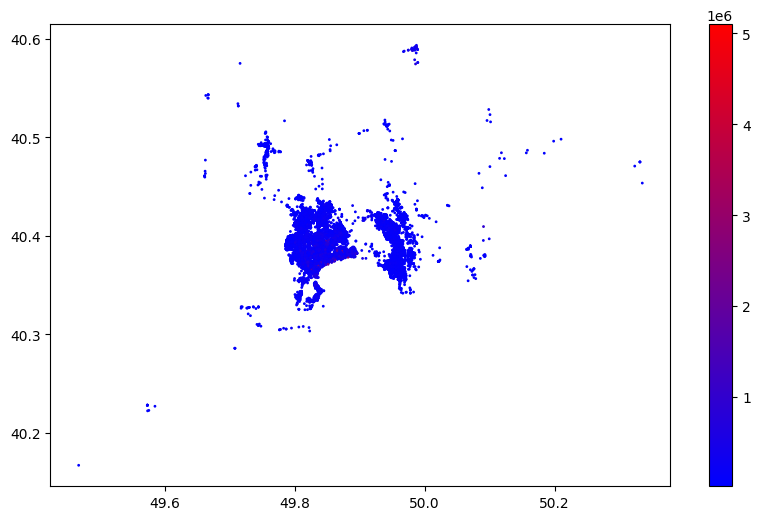

In [20]:
color_map = matplotlib.colors.LinearSegmentedColormap.from_list('custom', ['blue', 'purple', 'red'])
plt.figure(figsize=(10, 6))
plt.scatter(train_df['longitude'], train_df['latitude'], c=train_df['price'].values, cmap=color_map, s=1)
plt.colorbar()

In [21]:
coordinates_df = pd.DataFrame(data={
    'longitude': np.round(train_df['longitude'], 2),
    'latitude': np.round(train_df['latitude'], 2),
    'price': train_df['price']
})
coordinates_df = coordinates_df.groupby(['longitude', 'latitude'], as_index=False).mean()
coordinates_df

,longitude,latitude,price
0,49.47,40.17,26000.000000
1,49.57,40.22,76000.000000
2,49.57,40.23,115500.000000
3,49.58,40.22,77000.000000
4,49.59,40.23,87500.000000
...,...,...,...
285,50.20,40.50,65000.000000
286,50.21,40.50,35000.000000
287,50.32,40.47,45000.000000
288,50.33,40.45,53000.000000


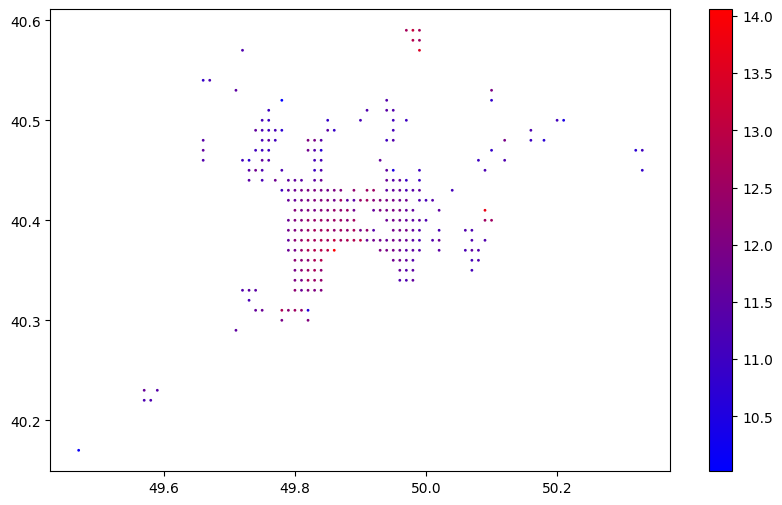

In [22]:
color_map = matplotlib.colors.LinearSegmentedColormap.from_list('custom', ['blue', 'purple', 'red'])
plt.figure(figsize=(10, 6))
plt.scatter(
    coordinates_df['longitude'],
    coordinates_df['latitude'],
    c=np.log(coordinates_df['price'].values),
    cmap=color_map, s=1)
plt.colorbar()

In [23]:
epicenters_df = coordinates_df.sort_values(by='price', ascending=False)[:3]
epicenters_df

,longitude,latitude,price
138,49.86,40.37,1273468.75
274,50.09,40.41,935000.00
250,49.99,40.57,700000.00


In [27]:
train_df.corr()

,floors,area,rooms,new_building,price,distance
floors,1.000000,0.309880,0.074474,0.738367,0.256100,-0.148141
area,0.309880,1.000000,0.773854,0.323479,0.810958,-0.296694
rooms,0.074474,0.773854,1.000000,0.052298,0.580747,-0.159316
new_building,0.738367,0.323479,0.052298,1.000000,0.246758,-0.120306
price,0.256100,0.810958,0.580747,0.246758,1.000000,-0.382205
distance,-0.148141,-0.296694,-0.159316,-0.120306,-0.382205,1.000000


In [28]:
def to_standard(series):
    return np.apply_along_axis(
        lambda entry: (entry - np.min(series)) / (np.max(series) - np.min(series)), 0, series
    )

Fitting 4 distributions: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,15.229061,1040.842766,-176528.349792,inf,0.024153,1.380513e-12
lognorm,26.786561,1652.555905,-162994.795054,inf,0.031048,1.607142e-20
beta,150.613538,9391.508406,-121568.733047,inf,0.102363,3.018503e-219
norm,485.864362,22168.668621,-93498.547725,inf,0.178517,0.000000e+00


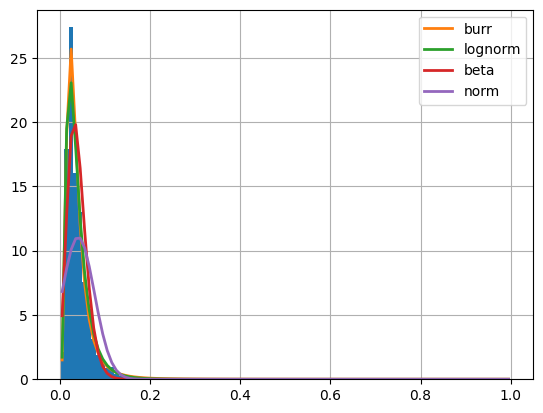

In [29]:
f = Fitter(to_standard(train_df['price'].values),
           distributions=['lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [30]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 3.3048942703380386,
  'd': 11.258572792459782,
  'loc': -0.01999188295136256,
  'scale': 0.022499081964217273}}

In [31]:
for key in train_df.keys():
    if key != 'price':
        train_df[key] = to_standard(train_df[key])
train_df

,floors,area,rooms,new_building,price,distance
0,0.25000,0.052594,0.105263,0.0,130000,0.166102
1,0.37500,0.048991,0.052632,1.0,137000,0.166102
2,0.46875,0.095821,0.105263,1.0,280000,0.064533
3,0.06250,0.038184,0.105263,0.0,220000,0.045632
4,0.46875,0.052594,0.052632,1.0,126000,0.166102
...,...,...,...,...,...,...
23979,0.65625,0.067003,0.105263,1.0,168000,0.164527
23980,0.46875,0.115994,0.105263,1.0,398000,0.051018
23981,0.71875,0.154179,0.210526,1.0,350000,0.032266
23982,0.40625,0.075648,0.157895,1.0,230000,0.196269
